In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### **Matplotlip**

In [8]:
tip_mean_gender = df[['sex','tip']].groupby('sex').mean().reset_index()
tip_mean_gender

,sex,tip
0,Male,3.089618
1,Female,2.833448


Text(0.5, 1.0, 'Gender Mean of Tip Given')

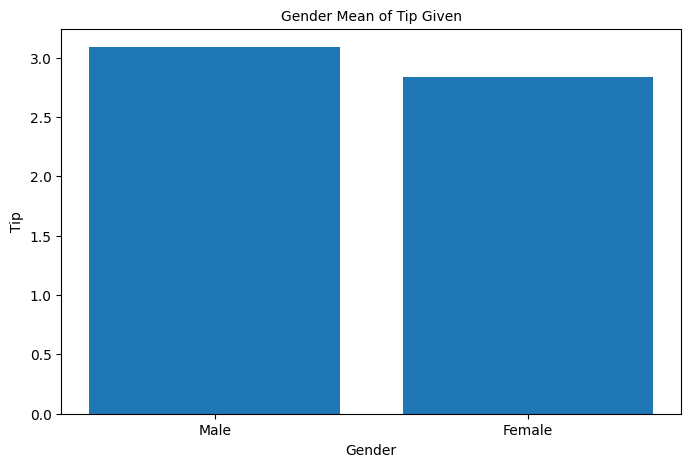

In [11]:
plt.figure(figsize=(8,5))
plt.bar(tip_mean_gender['sex'],
        tip_mean_gender['tip'])
plt.xlabel('Gender')
plt.ylabel('Tip')
plt.title('Gender Mean of Tip Given', size=10)

### **Barplot Styling**

Text(0.5, 1.0, 'Gender Mean of Tip Given')

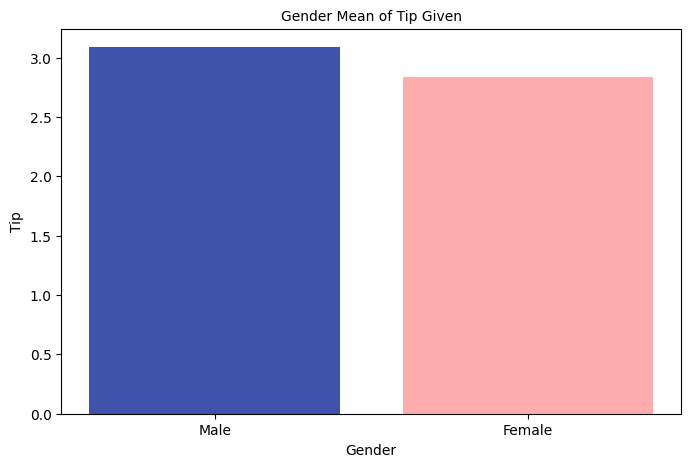

In [12]:
plt.figure(figsize=(8,5))
plt.bar(tip_mean_gender['sex'],
        tip_mean_gender['tip'], 
        color=['#3E54AC','#FFACAC'])
plt.xlabel('Gender')
plt.ylabel('Tip')
plt.title('Gender Mean of Tip Given', size=10)

Text(0.5, 1.0, 'Gender Mean of Tip Given')

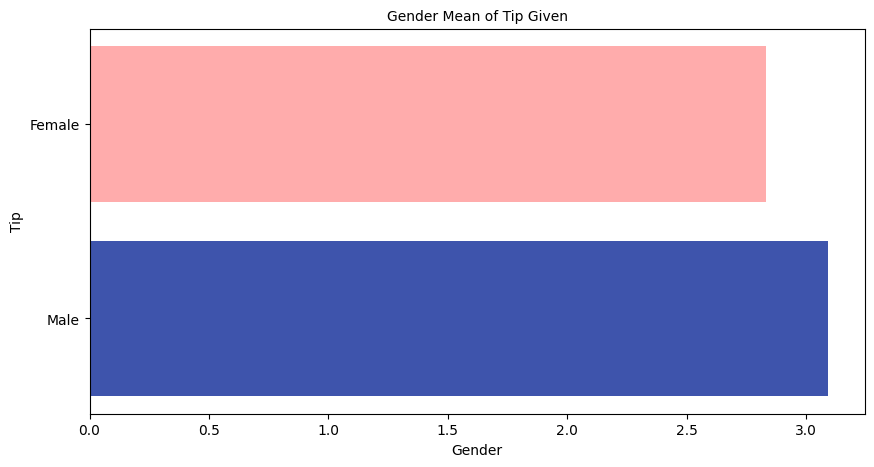

In [13]:
plt.figure(figsize=(10,5))
plt.barh(tip_mean_gender['sex'],
         tip_mean_gender['tip'],
         color=['#3E54AC','#FFACAC'])
plt.xlabel('Gender')
plt.ylabel('Tip')
plt.title('Gender Mean of Tip Given', size=10)

### **Barplot Advanced Using**

In [15]:
tip_mean_day = df[['day','tip']].groupby('day').mean().reset_index()
tip_mean_day

,day,tip
0,Thur,2.771452
1,Fri,2.734737
2,Sat,2.993103
3,Sun,3.255132


In [16]:
mean_tip = df['tip'].mean()
mean_tip

2.99827868852459

Text(0.0, 1.0, 'On weekends customers trend to give bigger tips compared to other days, especially on Sunday nights ')

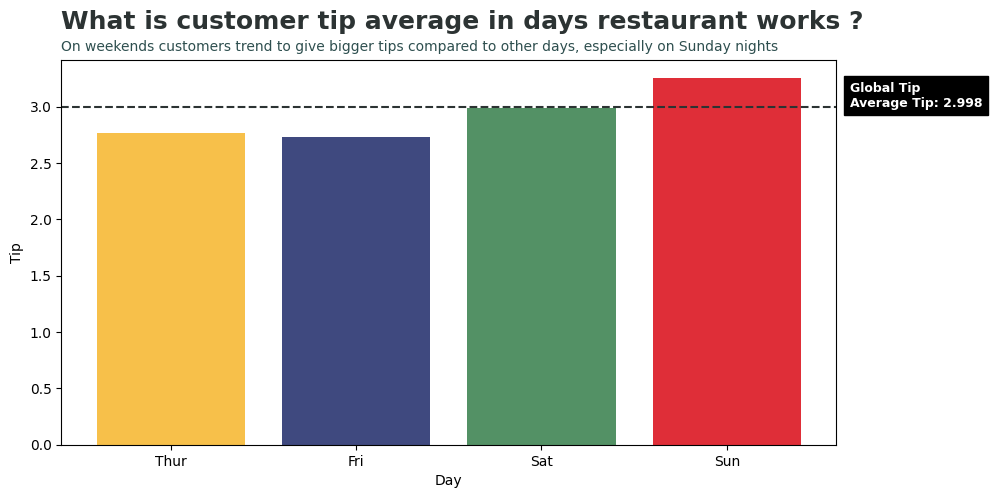

In [21]:
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(tip_mean_day['day'],
       tip_mean_day['tip'],
       color=['#F7C04A', '#3F497F', '#539165', '#DF2E38'])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
plt.axhline(mean_tip,linestyle='--', color='#2C3333')
ax.text(s=f'Global Tip\nAverage Tip: {mean_tip:.3f}',
        x=xmax*1.02,
        y=mean_tip,
        fontsize=9,
        backgroundcolor='black',
        color='white',
        fontweight='bold')

plt.xlabel('Day')
plt.ylabel('Tip')

plt.text(s='What is customer tip average in days restaurant works ?',
         ha='left', x=xmin, y=ymax*1.08,
         fontsize=18, fontweight='bold',
         color='#2C3333')
plt.title('On weekends customers trend to give bigger tips compared to other days, especially on Sunday nights ',
          loc='left',
          fontsize=10,
          color='#2E4F4F')


### **Seaborn**

<Axes: title={'center': 'Average tip given by gender of customer'}, xlabel='sex', ylabel='tip'>

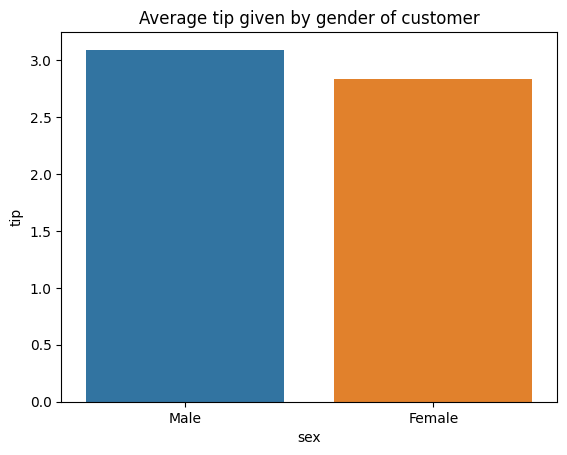

In [24]:
plt.title('Average tip given by gender of customer')
sns.barplot(x='sex',y='tip',data=df, errorbar=None)

<Axes: title={'center': 'Average tip given by gender of customer'}, xlabel='sex', ylabel='tip'>

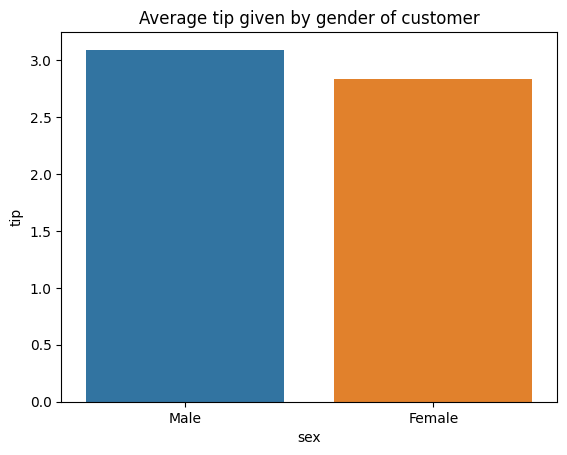

In [25]:
plt.title('Average tip given by gender of customer')
sns.barplot(x='sex',y='tip',data=tip_mean_gender)

<Axes: title={'center': 'Average tip given by gender of customer'}, xlabel='tip', ylabel='sex'>

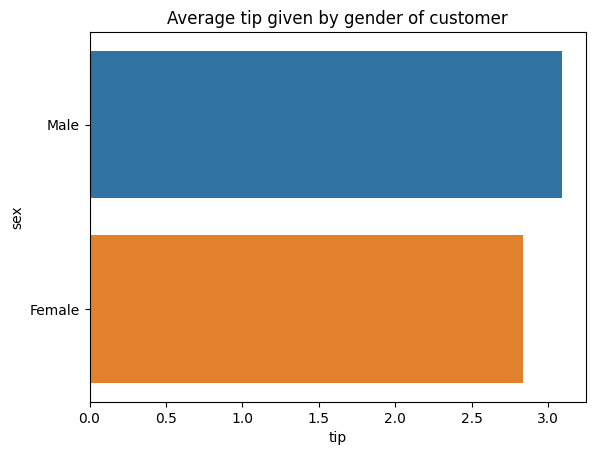

In [26]:
plt.title('Average tip given by gender of customer')
sns.barplot(y='sex',x='tip',data=tip_mean_gender)

### **countplot**

<Axes: xlabel='count', ylabel='day'>

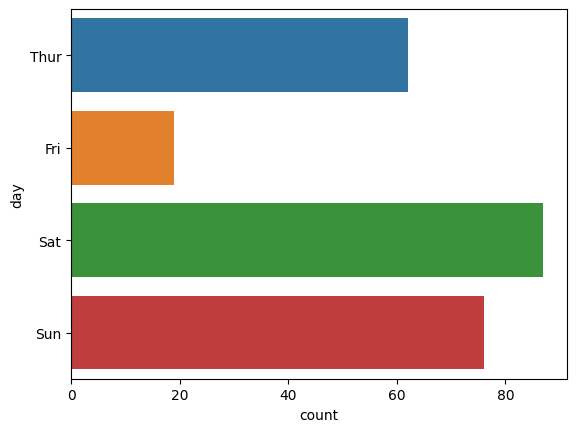

In [28]:
sns.countplot(y='day',data=df)

### **estimator**

<Axes: title={'center': 'Average tip given by gender of customer'}, xlabel='tip', ylabel='sex'>

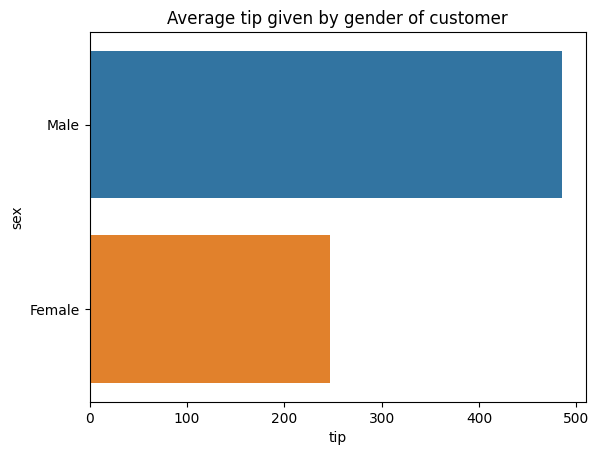

In [29]:
plt.title('Average tip given by gender of customer')
sns.barplot(y='sex',x='tip',data=df,estimator=np.sum, errorbar=None)

### **Barplot Annotate Text**

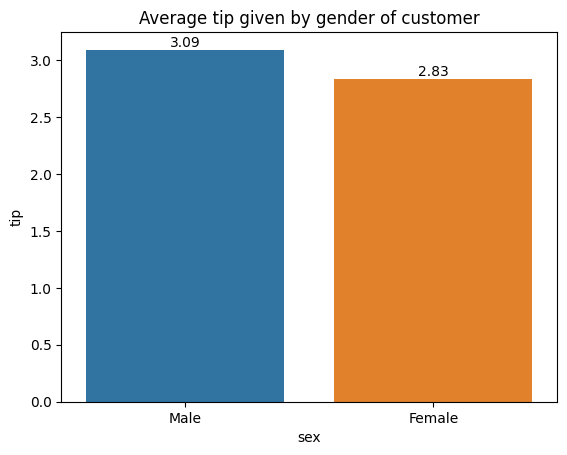

In [30]:
plt.title('Average tip given by gender of customer')
plots = sns.barplot(x='sex', y='tip', data=tip_mean_gender)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    size=10,xytext=(0,5),
                    textcoords='offset points')

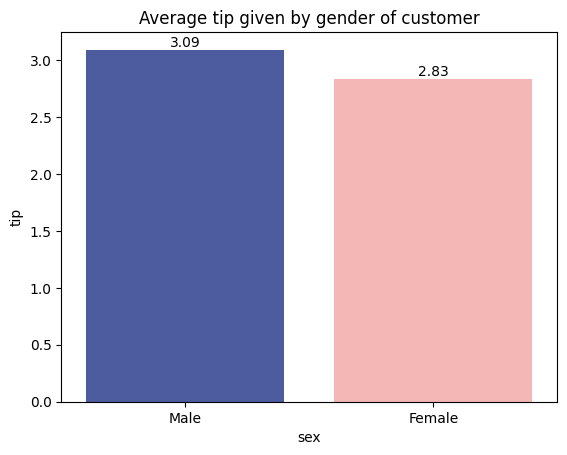

In [31]:
plt.title('Average tip given by gender of customer')
plots = sns.barplot(x='sex',y='tip',
                    data=tip_mean_gender,
                    palette=['#3E54AC','#FFACAC'])

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0,5),
                    textcoords='offset points')

### **Barplot Hue and Estimator**

In [33]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


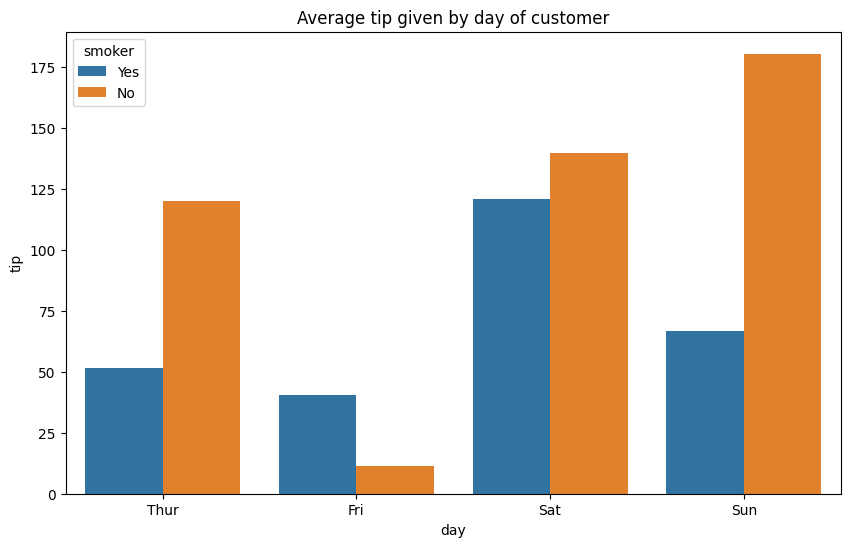

In [32]:
plt.figure(figsize=(10,6))
plt.title('Average tip given by day of customer')
sns.barplot(x='day', y='tip',
            data=df, hue='smoker',
            errorbar=None,
            estimator=np.sum)
plt.show()

### **Stacked Barplot**

In [34]:
total = df.groupby('day')['total_bill'].sum().reset_index()
total

,day,total_bill
0,Thur,1096.33
1,Fri,325.88
2,Sat,1778.40
3,Sun,1627.16


In [36]:
smoker = df[df['smoker']=='Yes']
smoker = smoker.groupby('day')['total_bill'].sum().reset_index()
smoker

,day,total_bill
0,Thur,326.24
1,Fri,252.20
2,Sat,893.62
3,Sun,458.28


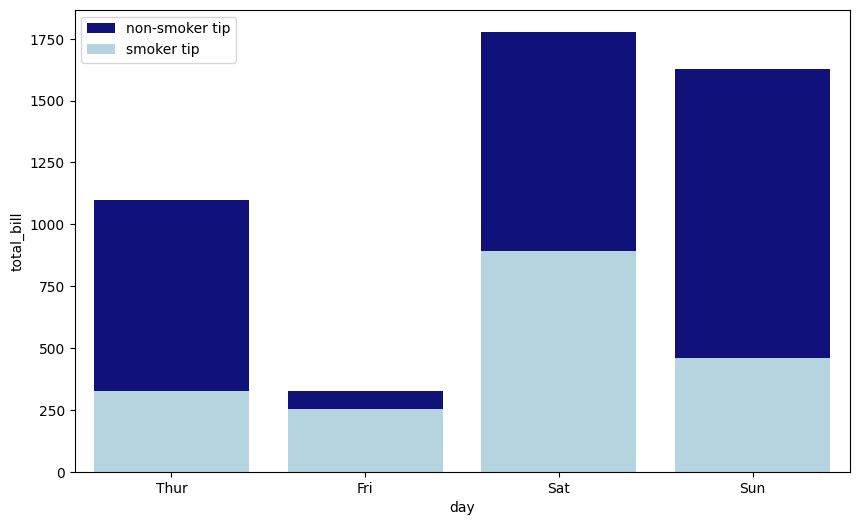

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x='day',
                    y='total_bill',
                    data=total,
                    color='darkblue',
                    label='non-smoker tip')
sns.barplot(x='day',
                    y='total_bill',
                    data=smoker,
                    color='lightblue',
                    label='smoker tip')

plt.legend(loc=2)
plt.show()
